### Область работы 1 (библиотеки)

In [1]:
from matplotlib.colors import ListedColormap
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, RocCurveDisplay, DetCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import plot_roc_curve


import sklearn
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.metrics import confusion_matrix  # for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor  # Decision Tree
from sklearn.neighbors import KNeighborsRegressor  # KNN
from sklearn.ensemble import RandomForestRegressor  # Random Forest
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm  # support vector Machine
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.naive_bayes import GaussianNB  # Naive bayes

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


sns.set()

### Область работы 2 (поиск лучшей модели)

In [2]:
path_train = pd.read_csv('train.csv')
path_test = pd.read_csv('test.csv')

In [3]:
path_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire LXI,2015,434999,25000,Petrol,Individual,Manual,Second Owner,20.85 kmpl,1197 CC,83.14 bhp,115Nm@ 4000rpm,5.0
1,Hyundai Grand i10 1.2 CRDi Sportz,2017,525000,29000,Diesel,Dealer,Manual,Second Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
2,Mahindra Bolero 2011-2019 SLE,2012,400000,120000,Diesel,Individual,Manual,First Owner,15.96 kmpl,2523 CC,62.1 bhp,195Nm@ 1400-2200rpm,7.0
3,Tata Indigo LS,2008,150000,60000,Diesel,Individual,Manual,Third Owner,17.0 kmpl,1405 CC,70 bhp,"13.5@ 2,500(kgm@ rpm)",5.0
4,Tata New Safari DICOR 2.2 EX 4x2,2011,229999,140000,Diesel,Individual,Manual,Second Owner,11.57 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0


In [4]:
path_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5929 non-null   object 
 1   year           5929 non-null   int64  
 2   selling_price  5929 non-null   int64  
 3   km_driven      5929 non-null   int64  
 4   fuel           5929 non-null   object 
 5   seller_type    5929 non-null   object 
 6   transmission   5929 non-null   object 
 7   owner          5929 non-null   object 
 8   mileage        5929 non-null   object 
 9   engine         5929 non-null   object 
 10  max_power      5929 non-null   object 
 11  torque         5929 non-null   object 
 12  seats          5929 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 602.3+ KB


In [5]:
path_train.keys()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
path_train.owner.unique()

array(['Second Owner', 'First Owner', 'Third Owner', 'Test Drive Car',
       'Fourth & Above Owner'], dtype=object)

In [7]:
path_train.fuel.unique()

array(['Petrol', 'Diesel', 'LPG', 'CNG'], dtype=object)

In [8]:
path_train.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [9]:
path_train.engine.unique()

array(['1197 CC', '1186 CC', '2523 CC', '1405 CC', '2179 CC', '1248 CC',
       '1798 CC', '1199 CC', '1948 CC', '1797 CC', '998 CC', '796 CC',
       '1196 CC', '1396 CC', '993 CC', '1497 CC', '1586 CC', '995 CC',
       '1598 CC', '1997 CC', '1498 CC', '799 CC', '1991 CC', '1047 CC',
       '936 CC', '1399 CC', '1999 CC', '2143 CC', '1495 CC', '1086 CC',
       '1198 CC', '1461 CC', '1364 CC', '1591 CC', '1061 CC', '2494 CC',
       '1794 CC', '1582 CC', '1298 CC', '1493 CC', '1995 CC', '1373 CC',
       '999 CC', '2987 CC', '2993 CC', '1193 CC', '2487 CC', '2982 CC',
       '2499 CC', '2489 CC', '793 CC', '2956 CC', '2498 CC', '814 CC',
       '1120 CC', '1984 CC', '2696 CC', '1969 CC', '1998 CC', '2497 CC',
       '1596 CC', '1194 CC', '1499 CC', '1496 CC', '1599 CC', '624 CC',
       '1368 CC', '2477 CC', '2776 CC', '1968 CC', '1781 CC', '1799 CC',
       '2148 CC', '1956 CC', '2755 CC', '2609 CC', '2393 CC', '1388 CC',
       '3604 CC', '2354 CC', '1896 CC', '1527 CC', '2446 CC',

In [10]:
path_train.torque.unique()

array(['115Nm@ 4000rpm', '190.24nm@ 1750-2250rpm', '195Nm@ 1400-2200rpm',
       '13.5@ 2,500(kgm@ rpm)', '320Nm@ 1700-2700rpm', '190Nm@ 2000rpm',
       '320Nm@ 1400-4100rpm', '290Nm@ 1800-2800rpm', '108Nm@ 4400rpm',
       '190Nm@ 2000-3000', '113.7Nm@ 4000rpm', '177.5Nm@ 4700rpm',
       '90Nm@ 3500rpm', '59Nm@ 2500rpm', '113Nm@ 4500rpm',
       '101Nm@ 3000rpm', '22.4 kgm at 1750-2750rpm', '78Nm@ 4500rpm',
       '113Nm@ 4200rpm', '12.7@ 2,700(kgm@ rpm)', '205Nm@ 1750rpm',
       '200Nm@ 1750-3000rpm', '200Nm@ 1750rpm', '145Nm@ 4100rpm',
       '90.3Nm@ 4200rpm', '135.4Nm@ 2500rpm', '62Nm@ 3000rpm',
       '250Nm@ 1500-2500rpm', '113.75nm@ 4000rpm', '280Nm@ 1800-2800rpm',
       '111.7Nm@ 4000rpm', '205Nm@ 1750-3250rpm', '72Nm@ 4386rpm',
       '32.1kgm@ 2000rpm', '114Nm@ 4000rpm', '140Nm@ 1800-3000rpm',
       '150Nm@ 1750rpm', '160Nm@ 2000rpm', '430Nm@ 1750-2500rpm',
       '400Nm@ 1400-2800rpm', '124.6Nm@ 3500rpm', '209Nm@ 2000rpm',
       '180Nm@ 2000rpm', '99.04Nm@ 4500rpm', '

In [11]:
path_train.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

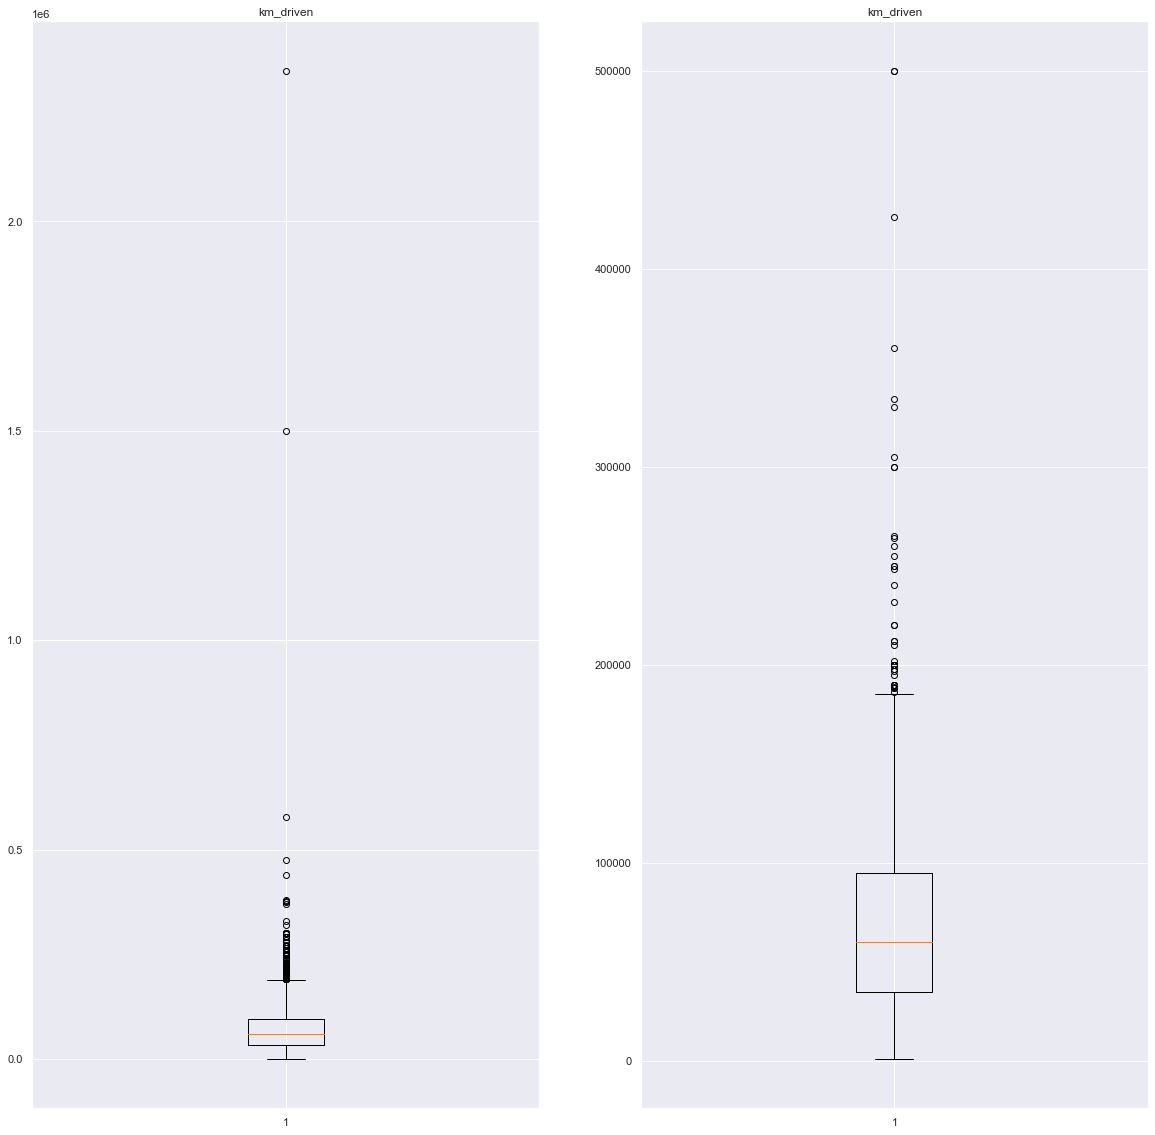

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.boxplot(path_train["km_driven"])
ax1.set_title("km_driven")

ax2.boxplot(path_test["km_driven"])
ax2.set_title("km_driven")


plt.show()

In [13]:
i_drop1 = path_test[path_test['km_driven'] > 400000]

i_drop1

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1349,Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV,2010,426000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
1589,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,500000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.57 bhp,200Nm@ 1400-3400rpm,7.0
1711,Maruti Wagon R VXI BS IV,2011,500000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0


In [14]:
i_drop2 = path_train[path_train['km_driven'] > 400000]

i_drop2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
792,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
1622,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
2615,Mahindra Scorpio M2DI,2011,400000,475000,Diesel,Individual,Manual,Third Owner,13.5 kmpl,2179 CC,115 bhp,277.5Nm@ 1700-2200rpm,5.0
3094,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,440000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1400-3400rpm,7.0
3976,Maruti Wagon R LXI Minor,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0


In [15]:
i_drop1 = i_drop1.index
i_drop2 = i_drop2.index
path_train = path_train.drop(i_drop2, axis=0)
path_test = path_test.drop(i_drop1, axis=0)
print(path_train.shape)

(5924, 13)


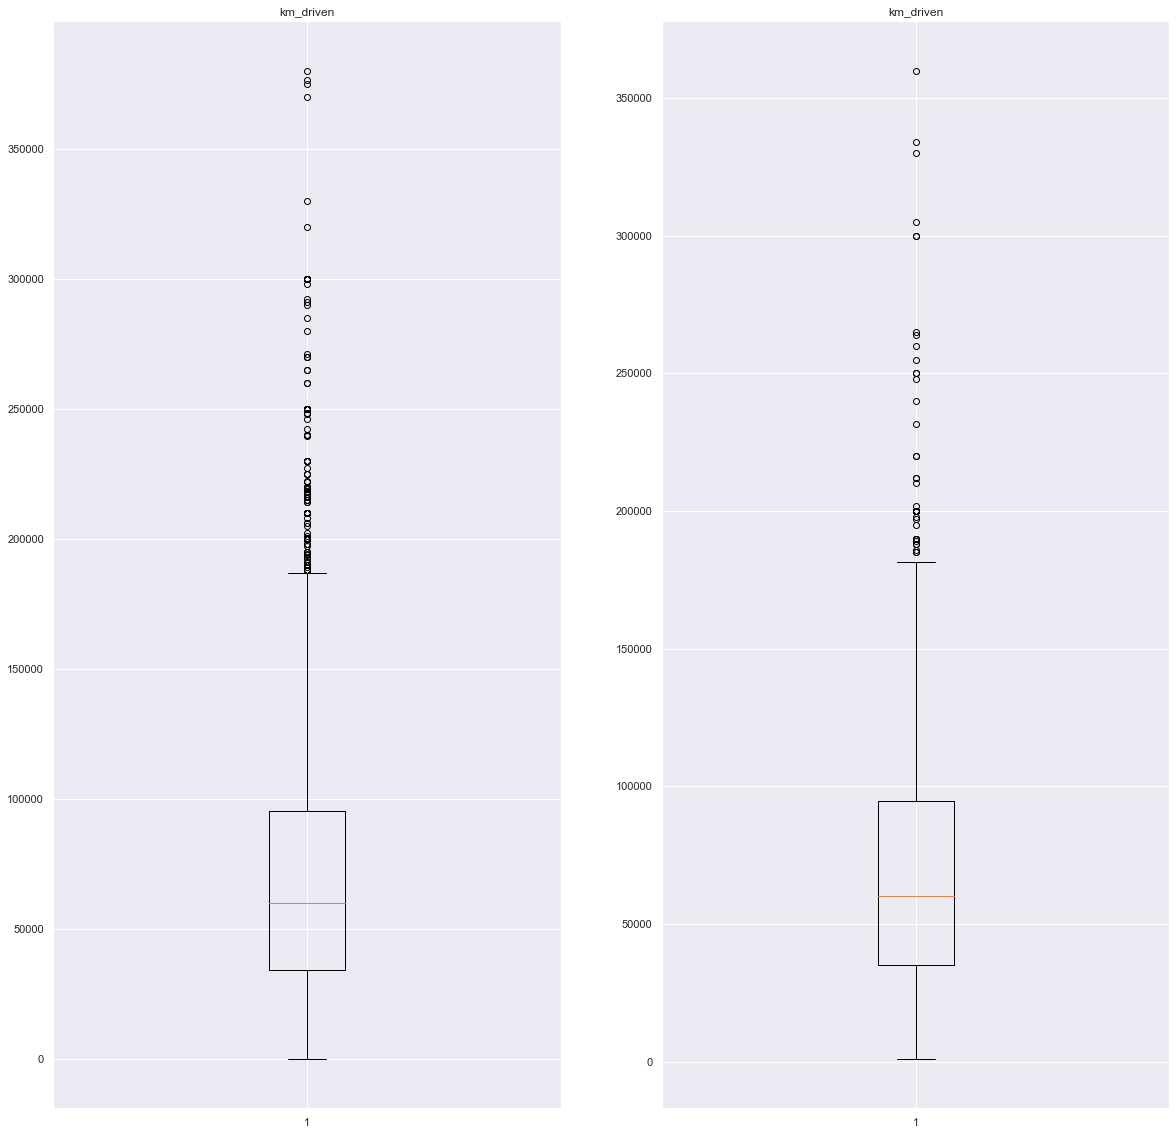

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.boxplot(path_train["km_driven"])
ax1.set_title("km_driven")

ax2.boxplot(path_test["km_driven"])
ax2.set_title("km_driven")


plt.show()

In [17]:
print(path_train.isnull().sum())
print('-------------------')
print(path_test.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64
-------------------
name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
torque          0
seats           0
dtype: int64


In [18]:
print(path_train['name'].value_counts())
print('___________________________________________________')
print(path_test['name'].value_counts())

Maruti Swift Dzire VDI                             97
Maruti Alto 800 LXI                                60
Maruti Alto LXi                                    53
Maruti Swift VDI                                   48
BMW X4 M Sport X xDrive20d                         46
                                                   ..
Maruti Wagon R AX Minor                             1
Ford Fiesta 1.6 Duratec EXI                         1
Renault Duster 85PS Diesel STD                      1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV     1
Audi Q5 2.0 TDI                                     1
Name: name, Length: 1761, dtype: int64
___________________________________________________
Maruti Swift Dzire VDI               32
Maruti Alto 800 LXI                  22
Maruti Alto LXi                      18
BMW X4 M Sport X xDrive20d           16
Maruti Baleno Alpha 1.3              14
                                     ..
Skoda Rapid 1.6 MPI Ambition Plus     1
Maruti Omni 8 Seater BSII          

In [19]:
path_train['mileage'][0].split()[0], path_train['mileage'][0].split()[1]

('20.85', 'kmpl')

In [20]:
# mile_age_val = pd.DataFrame(columns=['mileage_value'])
# mile_age_measure = pd.DataFrame(columns=['mileage_measure'])
# path_train = pd.concat([path_train, mile_age_val, mile_age_measure], axis=1)

# for i in path_train.index:
#     value = path_train['mileage'][i].split()[0]
#     measure = path_train['mileage'][i].split()[1]
#     path_train['mileage_value'][i] = value
#     path_train['mileage_measure'][i] = measure

# path_train.drop('mileage', axis=1, inplace=True)
Correct_Mileage= []
for i in path_train.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
#         print(i)
        Correct_Mileage.append(float(i))
path_train['mileage']=Correct_Mileage

In [21]:
path_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire LXI,2015,434999,25000,Petrol,Individual,Manual,Second Owner,20.8,1197 CC,83.14 bhp,115Nm@ 4000rpm,5.0
1,Hyundai Grand i10 1.2 CRDi Sportz,2017,525000,29000,Diesel,Dealer,Manual,Second Owner,24.0,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
2,Mahindra Bolero 2011-2019 SLE,2012,400000,120000,Diesel,Individual,Manual,First Owner,15.9,2523 CC,62.1 bhp,195Nm@ 1400-2200rpm,7.0
3,Tata Indigo LS,2008,150000,60000,Diesel,Individual,Manual,Third Owner,17.0,1405 CC,70 bhp,"13.5@ 2,500(kgm@ rpm)",5.0
4,Tata New Safari DICOR 2.2 EX 4x2,2011,229999,140000,Diesel,Individual,Manual,Second Owner,11.5,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0


In [22]:
engine_val = pd.DataFrame(columns=['engine_value'])
engine_measure = pd.DataFrame(columns=['engine_measure'])
path_train = pd.concat([path_train, engine_val, engine_measure], axis=1)

for i in path_train.index:
    value = path_train['engine'][i].split()[0]
    measure = path_train['engine'][i].split()[1]
    path_train['engine_value'][i] = value
    path_train['engine_measure'][i] = measure

path_train.drop('engine', axis=1, inplace=True)

In [23]:
path_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,max_power,torque,seats,engine_value,engine_measure
0,Maruti Swift Dzire LXI,2015,434999,25000,Petrol,Individual,Manual,Second Owner,20.8,83.14 bhp,115Nm@ 4000rpm,5.0,1197,CC
1,Hyundai Grand i10 1.2 CRDi Sportz,2017,525000,29000,Diesel,Dealer,Manual,Second Owner,24.0,73.97 bhp,190.24nm@ 1750-2250rpm,5.0,1186,CC


In [24]:
power_val = pd.DataFrame(columns=['power_value'])
power_measure = pd.DataFrame(columns=['power_measure'])
path_train = pd.concat([path_train, power_val, power_measure], axis=1)


for i in path_train.index:
    value = path_train['max_power'][i].split()[0]
    measure = path_train['max_power'][i].split()[1]
    path_train['power_value'][i] = value
    path_train['power_measure'][i] = measure

path_train.drop('max_power', axis=1, inplace=True)

In [25]:
path_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,torque,seats,engine_value,engine_measure,power_value,power_measure
0,Maruti Swift Dzire LXI,2015,434999,25000,Petrol,Individual,Manual,Second Owner,20.8,115Nm@ 4000rpm,5.0,1197,CC,83.14,bhp
1,Hyundai Grand i10 1.2 CRDi Sportz,2017,525000,29000,Diesel,Dealer,Manual,Second Owner,24.0,190.24nm@ 1750-2250rpm,5.0,1186,CC,73.97,bhp
2,Mahindra Bolero 2011-2019 SLE,2012,400000,120000,Diesel,Individual,Manual,First Owner,15.9,195Nm@ 1400-2200rpm,7.0,2523,CC,62.1,bhp
3,Tata Indigo LS,2008,150000,60000,Diesel,Individual,Manual,Third Owner,17.0,"13.5@ 2,500(kgm@ rpm)",5.0,1405,CC,70,bhp
4,Tata New Safari DICOR 2.2 EX 4x2,2011,229999,140000,Diesel,Individual,Manual,Second Owner,11.5,320Nm@ 1700-2700rpm,7.0,2179,CC,138.1,bhp


In [26]:
print('________________________________________')
print(path_train.engine_measure.unique())
print('________________________________________')
print(path_train.power_measure.unique())

________________________________________
['CC']
________________________________________
['bhp']


In [27]:
path_train.owner.unique()

array(['Second Owner', 'First Owner', 'Third Owner', 'Test Drive Car',
       'Fourth & Above Owner'], dtype=object)

In [28]:
target = ['selling_price']
columns_to_drop = ['name', 'torque', 'engine_measure', 'power_measure']
columns_to_encode = ['fuel', 'seller_type', 'transmission', 'owner']
columns_to_normalize = ['year', 'km_driven','fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'seats', 'engine_value', 'power_value']

In [29]:
path_train = path_train.drop(columns_to_drop, axis=1)


In [30]:
path_train.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine_value,power_value
0,2015,434999,25000,Petrol,Individual,Manual,Second Owner,20.8,5.0,1197,83.14
1,2017,525000,29000,Diesel,Dealer,Manual,Second Owner,24.0,5.0,1186,73.97


<AxesSubplot:xlabel='year', ylabel='selling_price'>

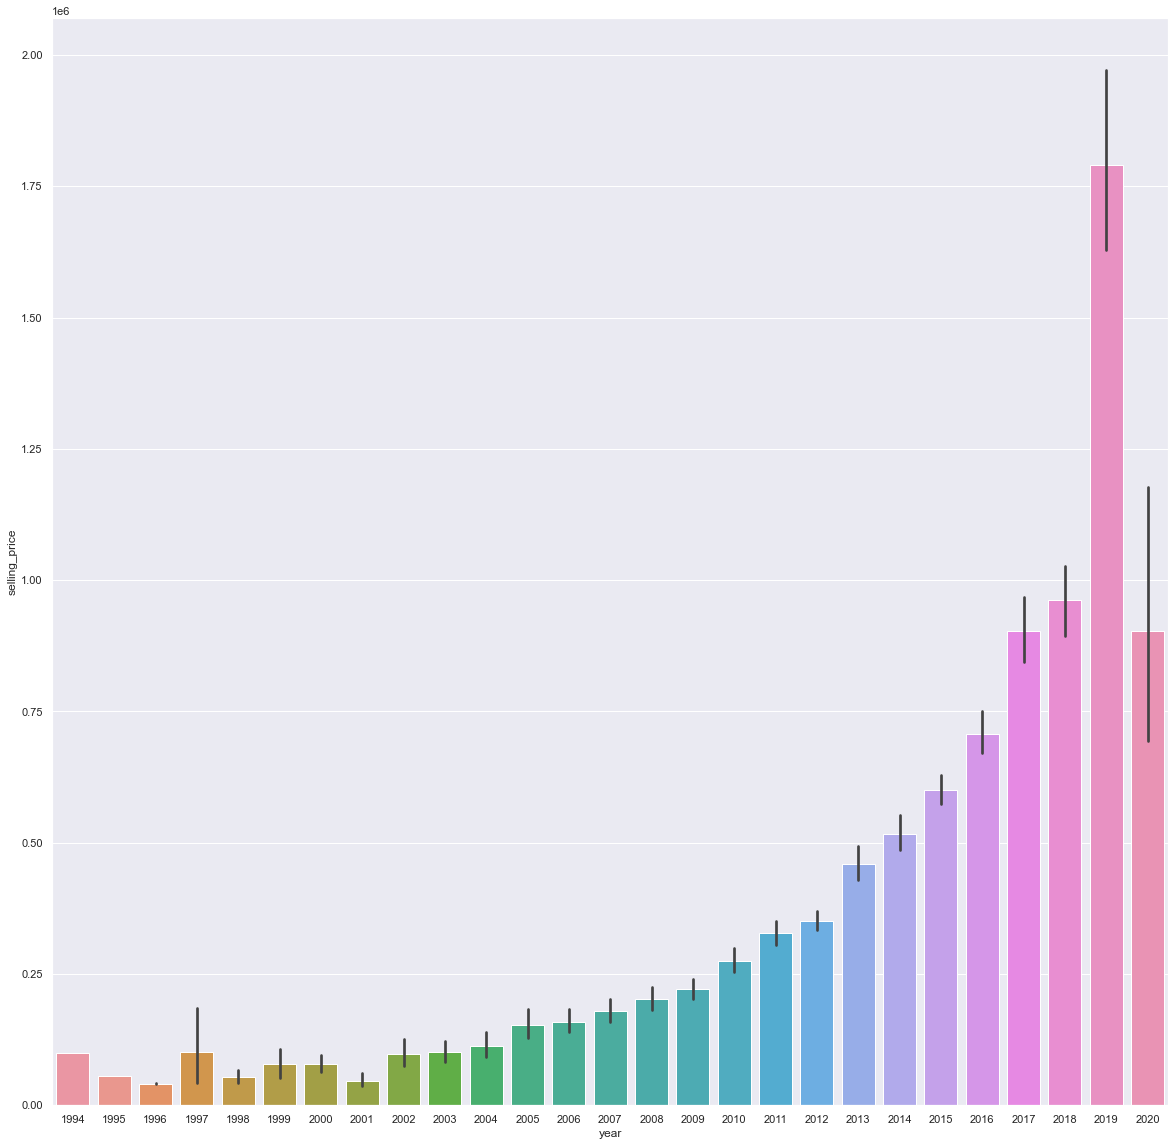

In [31]:
plt.figure(figsize=(20, 20))
sns.barplot('year', 'selling_price', data=path_train)

<AxesSubplot:xlabel='year', ylabel='count'>

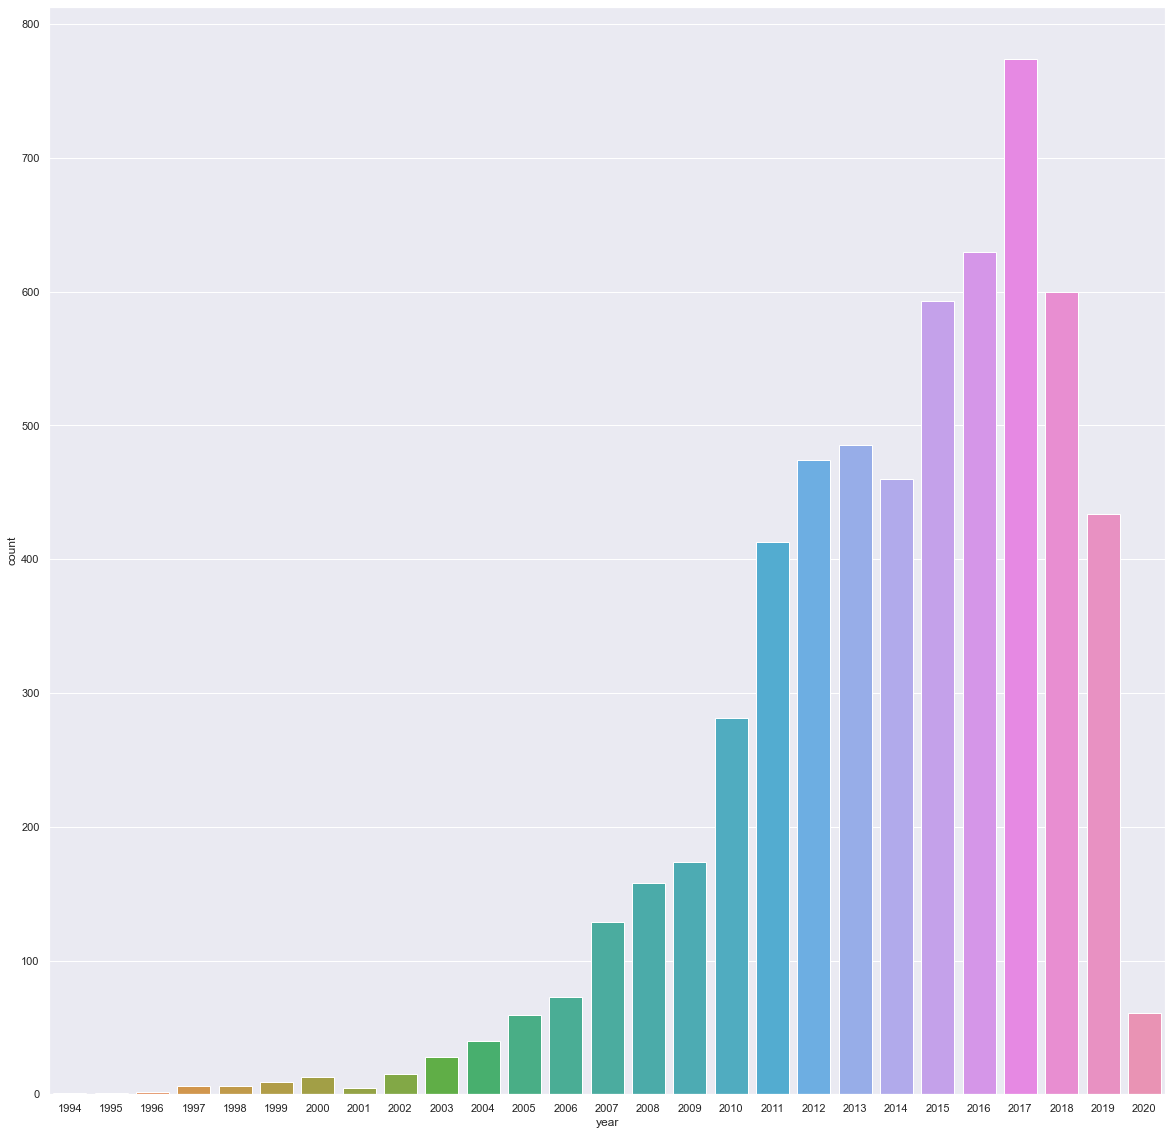

In [32]:
plt.figure(figsize=(20, 20))
sns.countplot('year', data=path_train)

In [33]:
year_after_2014 = pd.DataFrame(columns=['year_after_2014'])
path_train = pd.concat([path_train, year_after_2014], axis=1)

for i in path_train.index:
    val = path_train['year'][i]
    if val > 2014:
        path_train['year_after_2014'][i] = 1
    else:
        path_train['year_after_2014'][i] = 0

In [34]:
path_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine_value,power_value,year_after_2014
0,2015,434999,25000,Petrol,Individual,Manual,Second Owner,20.8,5.0,1197,83.14,1
1,2017,525000,29000,Diesel,Dealer,Manual,Second Owner,24.0,5.0,1186,73.97,1
2,2012,400000,120000,Diesel,Individual,Manual,First Owner,15.9,7.0,2523,62.1,0
3,2008,150000,60000,Diesel,Individual,Manual,Third Owner,17.0,5.0,1405,70,0
4,2011,229999,140000,Diesel,Individual,Manual,Second Owner,11.5,7.0,2179,138.1,0


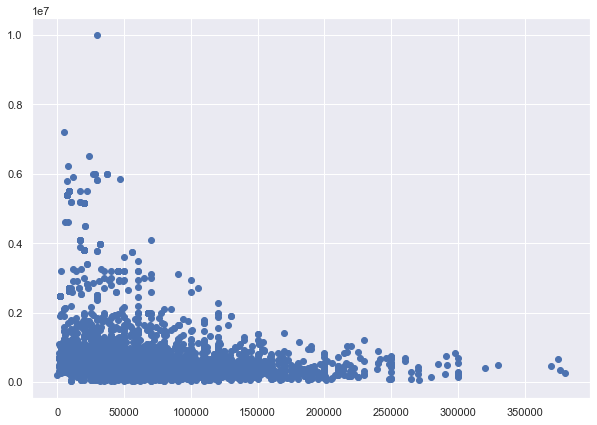

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(path_train['km_driven'], path_train['selling_price'])

In [36]:
less_80k = pd.DataFrame(columns=['kilometers_driven_less_80k'])
path_train = pd.concat([path_train, less_80k])

for i in path_train.index:
    value = path_train['km_driven'][i]
    if value < 80000:
        path_train['kilometers_driven_less_80k'][i] = 1
    else:
        path_train['kilometers_driven_less_80k'][i] = 0

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

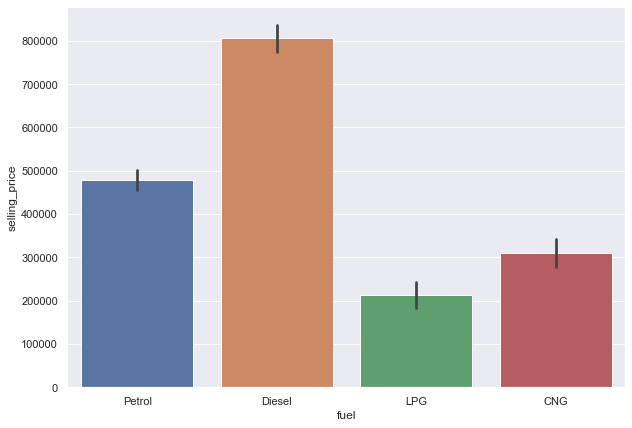

In [37]:
plt.figure(figsize=(10, 7))
sns.barplot('fuel', 'selling_price', data=path_train)

In [38]:
path_train.fuel.value_counts()

Diesel    3226
Petrol    2632
CNG         38
LPG         28
Name: fuel, dtype: int64

In [39]:
is_diesel = pd.DataFrame(columns=['is_diesel'])
path_train = pd.concat([path_train, is_diesel], axis=1)

for i in path_train.index:
    value = path_train['fuel'][i]
    if value == 'Diesel':
        path_train['is_diesel'][i] = 1
    else:
        path_train['is_diesel'][i] = 0

In [40]:
path_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine_value,power_value,year_after_2014,kilometers_driven_less_80k,is_diesel
0,2015.0,434999.0,25000.0,Petrol,Individual,Manual,Second Owner,20.8,5.0,1197,83.14,1,1,0
1,2017.0,525000.0,29000.0,Diesel,Dealer,Manual,Second Owner,24.0,5.0,1186,73.97,1,1,1
2,2012.0,400000.0,120000.0,Diesel,Individual,Manual,First Owner,15.9,7.0,2523,62.1,0,0,1
3,2008.0,150000.0,60000.0,Diesel,Individual,Manual,Third Owner,17.0,5.0,1405,70,0,1,1
4,2011.0,229999.0,140000.0,Diesel,Individual,Manual,Second Owner,11.5,7.0,2179,138.1,0,0,1


<AxesSubplot:xlabel='transmission', ylabel='count'>

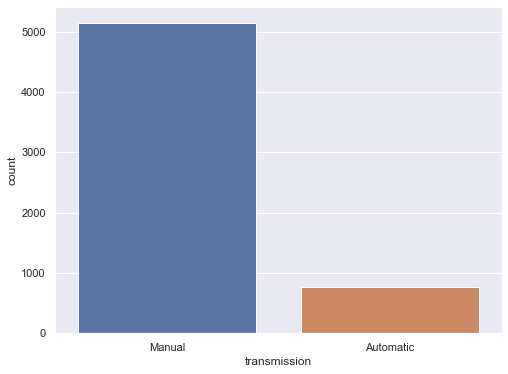

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot('transmission', data=path_train)

In [42]:
is_automatic = pd.DataFrame(columns=['is_automatic'])
path_train = pd.concat([path_train, is_automatic], axis=1)

for i in path_train.index:
    value = path_train['transmission'][i]
    if value == 'Automatic':
        path_train['is_automatic'][i] = 1
    else:
        path_train['is_automatic'][i] = 0

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

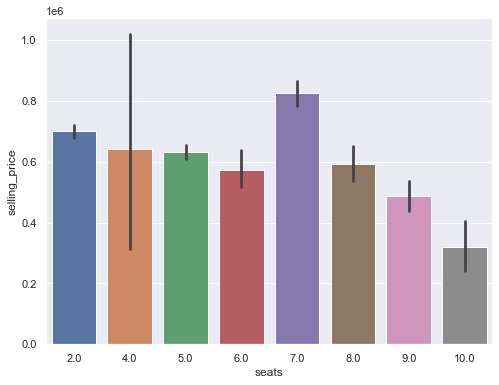

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot('seats', 'selling_price', data=path_train)

<AxesSubplot:xlabel='seats', ylabel='count'>

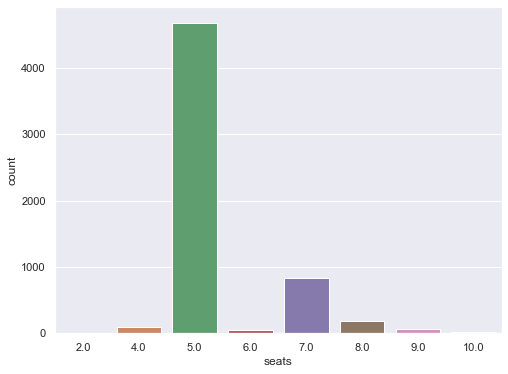

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot('seats', data=path_train)

In [45]:
is_4_seats = pd.DataFrame(columns=['is_4_seats'])
path_train = pd.concat([path_train, is_4_seats], axis=1)

for i in path_train.index:
    value = path_train['seats'][i]
    if value == 4:
        path_train['is_4_seats'][i] = 1
    else:
        path_train['is_4_seats'][i] = 0

In [46]:
path_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5924 entries, 0 to 5928
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        5924 non-null   float64
 1   selling_price               5924 non-null   float64
 2   km_driven                   5924 non-null   float64
 3   fuel                        5924 non-null   object 
 4   seller_type                 5924 non-null   object 
 5   transmission                5924 non-null   object 
 6   owner                       5924 non-null   object 
 7   mileage                     5924 non-null   float64
 8   seats                       5924 non-null   float64
 9   engine_value                5924 non-null   object 
 10  power_value                 5924 non-null   object 
 11  year_after_2014             5924 non-null   object 
 12  kilometers_driven_less_80k  5924 non-null   object 
 13  is_diesel                   5924 non-n

In [47]:
path_train.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine_value,power_value,year_after_2014,kilometers_driven_less_80k,is_diesel,is_automatic,is_4_seats
0,2015.0,434999.0,25000.0,Petrol,Individual,Manual,Second Owner,20.8,5.0,1197,83.14,1,1,0,0,0
1,2017.0,525000.0,29000.0,Diesel,Dealer,Manual,Second Owner,24.0,5.0,1186,73.97,1,1,1,0,0


In [48]:
for i in ['year_after_2014', 'kilometers_driven_less_80k', 
          'is_diesel', 'is_automatic', 'is_4_seats', 
          'engine_value', 'power_value']:
    print(i)
    path_train[i] = path_train[i].astype('float64')

year_after_2014
kilometers_driven_less_80k
is_diesel
is_automatic
is_4_seats
engine_value
power_value


In [49]:
path_train['fuel'] = path_train['fuel'].map({'LPG': 0,
                                             'CNG': 1, 
                                             'Diesel': 2, 
                                             'Petrol': 3}).astype(int)

path_train['seller_type'] = path_train['seller_type'].map({'Individual': 0,
                                                           'Trustmark Dealer': 1,
                                                           'Dealer': 2}).astype(int)

path_train['transmission'] = path_train['transmission'].map({'Manual': 0,
                                                             'Automatic': 1}).astype(int)

path_train['owner'] = path_train['owner'].map({'Fourth & Above Owner': 0,
                                               'Third Owner': 1, 
                                               'Second Owner': 2, 
                                               'First Owner': 3,
                                               'Test Drive Car':4}).astype(int)

In [50]:
path_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine_value,power_value,year_after_2014,kilometers_driven_less_80k,is_diesel,is_automatic,is_4_seats
0,2015.0,434999.0,25000.0,3,0,0,2,20.8,5.0,1197.0,83.14,1.0,1.0,0.0,0.0,0.0
1,2017.0,525000.0,29000.0,2,2,0,2,24.0,5.0,1186.0,73.97,1.0,1.0,1.0,0.0,0.0
2,2012.0,400000.0,120000.0,2,0,0,3,15.9,7.0,2523.0,62.10,0.0,0.0,1.0,0.0,0.0
3,2008.0,150000.0,60000.0,2,0,0,1,17.0,5.0,1405.0,70.00,0.0,1.0,1.0,0.0,0.0
4,2011.0,229999.0,140000.0,2,0,0,2,11.5,7.0,2179.0,138.10,0.0,0.0,1.0,0.0,0.0


In [51]:
path_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5924 entries, 0 to 5928
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        5924 non-null   float64
 1   selling_price               5924 non-null   float64
 2   km_driven                   5924 non-null   float64
 3   fuel                        5924 non-null   int64  
 4   seller_type                 5924 non-null   int64  
 5   transmission                5924 non-null   int64  
 6   owner                       5924 non-null   int64  
 7   mileage                     5924 non-null   float64
 8   seats                       5924 non-null   float64
 9   engine_value                5924 non-null   float64
 10  power_value                 5924 non-null   float64
 11  year_after_2014             5924 non-null   float64
 12  kilometers_driven_less_80k  5924 non-null   float64
 13  is_diesel                   5924 non-n

In [52]:
path_train

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine_value,power_value,year_after_2014,kilometers_driven_less_80k,is_diesel,is_automatic,is_4_seats
0,2015.0,434999.0,25000.0,3,0,0,2,20.8,5.0,1197.0,83.14,1.0,1.0,0.0,0.0,0.0
1,2017.0,525000.0,29000.0,2,2,0,2,24.0,5.0,1186.0,73.97,1.0,1.0,1.0,0.0,0.0
2,2012.0,400000.0,120000.0,2,0,0,3,15.9,7.0,2523.0,62.10,0.0,0.0,1.0,0.0,0.0
3,2008.0,150000.0,60000.0,2,0,0,1,17.0,5.0,1405.0,70.00,0.0,1.0,1.0,0.0,0.0
4,2011.0,229999.0,140000.0,2,0,0,2,11.5,7.0,2179.0,138.10,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,2016.0,800000.0,70000.0,3,0,1,3,16.3,5.0,1798.0,189.30,1.0,1.0,0.0,1.0,0.0
5925,2019.0,640000.0,6000.0,3,0,0,3,19.0,5.0,1199.0,88.76,1.0,1.0,0.0,0.0,0.0
5926,2018.0,950000.0,25000.0,2,0,0,3,24.0,5.0,1248.0,88.50,1.0,1.0,1.0,0.0,0.0
5927,2015.0,3000000.0,70000.0,2,0,1,2,16.3,5.0,2179.0,187.70,1.0,1.0,1.0,1.0,0.0


In [53]:
from sklearn.ensemble import ExtraTreesClassifier
TOP_FEATURES = 10

forest = ExtraTreesClassifier(n_estimators=100, max_depth=5)
forest.fit(path_train.drop(['selling_price'], axis=1), path_train['selling_price'])

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 3 (0.133440)
2. feature 9 (0.111053)
3. feature 10 (0.108855)
4. feature 8 (0.098373)
5. feature 0 (0.096291)
6. feature 12 (0.077447)
7. feature 4 (0.062094)
8. feature 2 (0.057256)
9. feature 6 (0.054239)
10. feature 13 (0.049883)


In [54]:
means = path_train.drop(['selling_price'], axis=1).mean()
stds = path_train.drop(['selling_price'], axis=1).std()
train = (path_train - means) / stds

In [55]:
X = path_train.drop(['selling_price'], axis=1)
y = path_train.selling_price

In [56]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine_value,power_value,year_after_2014,kilometers_driven_less_80k,is_diesel,is_automatic,is_4_seats
0,2015.0,25000.0,3,0,0,2,20.8,5.0,1197.0,83.14,1.0,1.0,0.0,0.0,0.0
1,2017.0,29000.0,2,2,0,2,24.0,5.0,1186.0,73.97,1.0,1.0,1.0,0.0,0.0
2,2012.0,120000.0,2,0,0,3,15.9,7.0,2523.0,62.10,0.0,0.0,1.0,0.0,0.0
3,2008.0,60000.0,2,0,0,1,17.0,5.0,1405.0,70.00,0.0,1.0,1.0,0.0,0.0
4,2011.0,140000.0,2,0,0,2,11.5,7.0,2179.0,138.10,0.0,0.0,1.0,0.0,0.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4739, 15)
(4739,)
(1185, 15)
(1185,)


In [58]:
# columns_to_encode = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
#        'mileage', 'seats', 'engine_value', 'power_value', 'year_after_2014',
#        'kilometers_driven_less_80k', 'is_diesel', 'is_automatic',
#        'is_4_seats']

In [59]:
def plotPred(y_pred):
    x_points=np.linspace(0,7e6)
    plt.figure(figsize=(12,5))
    plt.plot(x_points, x_points, color='r')
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values Vs Predicted Values');

Linear Regression train score:  0.7
Linear Regression test score:  0.7
Mean absolute error:  276976.9032648594
Coefficient of determination:  0.6956791407111971


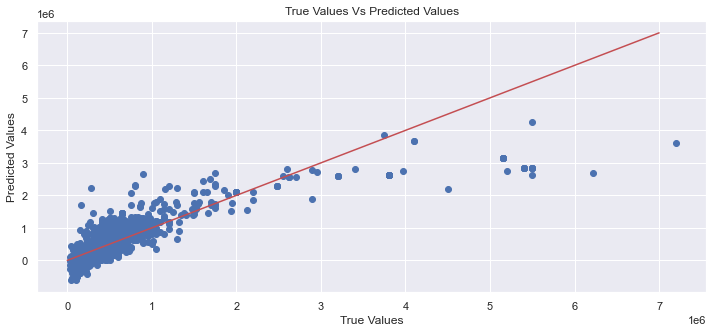

In [60]:
lireg = LinearRegression()
lireg.fit(X_train, y_train)

# train and test scores
lr_train_score = round(lireg.score(X_train, y_train), 2)
lr_test_score = round(lireg.score(X_test, y_test), 2)
# predicted output
y_pred_lr = lireg.predict(X_test)

print('Linear Regression train score: ', lr_train_score)
print('Linear Regression test score: ', lr_test_score)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_lr))
print('Coefficient of determination: ', r2_score(y_test, y_pred_lr))

# plot predicted vs true values
plotPred(y_pred_lr)

Decision Tree Regressor train score:  0.94
Decision Tree Regressor test score:  0.92
Mean absolute error:  133470.47504068492
Coefficient of determination:  0.9232682451052876


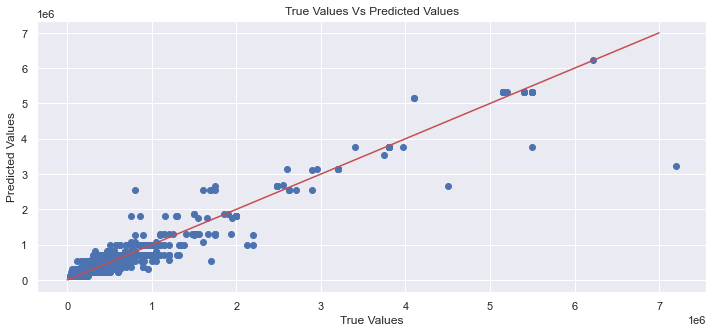

In [61]:
dtreg = DecisionTreeRegressor(splitter='best', max_depth=5)
dtreg.fit(X_train, y_train)

# train and test scores
dt_train_score = round(dtreg.score(X_train, y_train), 2)
dt_test_score = round(dtreg.score(X_test, y_test), 2)
# predicted output
y_pred_dt = dtreg.predict(X_test)

print('Decision Tree Regressor train score: ', dt_train_score)
print('Decision Tree Regressor test score: ', dt_test_score)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_dt))
print('Coefficient of determination: ', r2_score(y_test, y_pred_dt))

# plot predicted vs true values
plotPred(y_pred_dt)

Decision Tree Regressor train score:  0.99
Decision Tree Regressor test score:  0.96
Mean absolute error:  71718.91330379747
Coefficient of determination:  0.9584198703459843


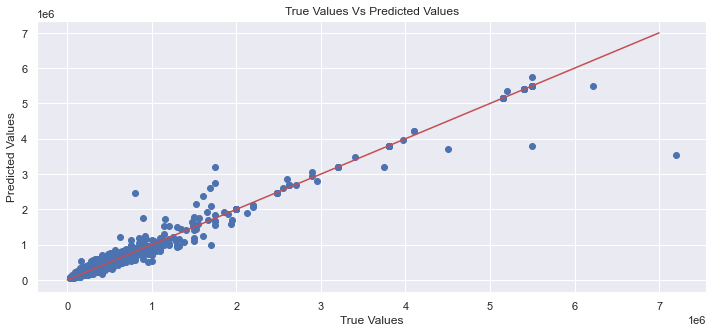

In [62]:
rfreg = RandomForestRegressor(criterion='mae', max_depth=15, n_estimators=500)
rfreg.fit(X_train, y_train)

# train and test scores
rf_train_score = round(rfreg.score(X_train, y_train), 2)
rf_test_score = round(rfreg.score(X_test, y_test), 2)
# predicted output
y_pred_rf = rfreg.predict(X_test)

print('Decision Tree Regressor train score: ', rf_train_score)
print('Decision Tree Regressor test score: ', rf_test_score)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_rf))
print('Coefficient of determination: ', r2_score(y_test, y_pred_rf))

# plot predicted vs true values
plotPred(y_pred_rf)

In [63]:
rf = RandomForestRegressor()

param_grid = {
    "criterion": ['mae'],
    "n_estimators": [500],
    "max_depth": [5, 6, 7, 12, 13, 15]
}

rf_model = GridSearchCV(estimator=rf, cv=3, param_grid=param_grid, n_jobs=-1, verbose=2)
rf_model.fit(X_train, y_train)
print(rf_model.best_score_)
print(rf_model.best_estimator_.get_params())

Fitting 3 folds for each of 6 candidates, totalling 18 fits
0.9511882695531392
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mae', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [64]:
print(rf_model.best_params_)
print(rf_model.best_estimator_)

{'criterion': 'mae', 'max_depth': 12, 'n_estimators': 500}
RandomForestRegressor(criterion='mae', max_depth=12, n_estimators=500)


GradientBoostingRegressor train score:  1.0
GradientBoostingRegressor test score:  0.97
Mean absolute error:  66041.90908027149
Coefficient of determination:  0.9663689330631731


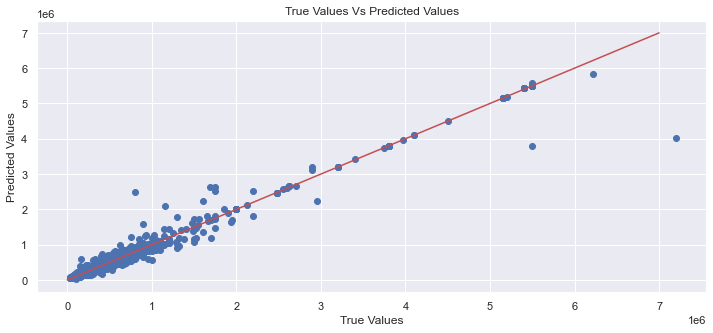

In [65]:
rfreg = GradientBoostingRegressor(learning_rate=0.05, max_depth=8, max_features='log2',
                          n_estimators=500)
rfreg.fit(X_train, y_train)

# train and test scores
rf_train_score = round(rfreg.score(X_train, y_train), 2)
rf_test_score = round(rfreg.score(X_test, y_test), 2)
# predicted output
y_pred_rf = rfreg.predict(X_test)

print('GradientBoostingRegressor train score: ', rf_train_score)
print('GradientBoostingRegressor test score: ', rf_test_score)
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_rf))
print('Coefficient of determination: ', r2_score(y_test, y_pred_rf))

# plot predicted vs true values
plotPred(y_pred_rf)

In [66]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[2, 4, 8, 12],
    "max_features":["log2","sqrt"],
    "n_estimators":[150, 200, 500]
    }

clf = GridSearchCV(GradientBoostingRegressor(), parameters, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1, verbose=2)

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

Fitting 5 folds for each of 168 candidates, totalling 840 fits
-0.14676262853933614


In [67]:
print(clf.best_params_)
print(clf.best_estimator_)

{'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}
GradientBoostingRegressor(learning_rate=0.05, max_depth=8, max_features='log2',
                          n_estimators=500)


In [68]:
gridresults = pd.DataFrame(clf.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,62,65,41,108,109,112,89,86,38,88,...,10,15,12,7,9,6,1,4,0,3
mean_fit_time,1.992302,1.992413,2.040224,0.599171,0.826839,0.81551,2.4504,2.938228,2.011647,1.094194,...,0.458622,0.595671,0.608182,0.451039,0.337518,0.340845,0.295603,0.296223,0.219354,0.211286
std_fit_time,0.011109,0.018866,0.037434,0.005852,0.009926,0.017205,0.054107,0.059162,0.017609,0.081983,...,0.014708,0.005389,0.009601,0.009551,0.003826,0.00472,0.008719,0.01634,0.006349,0.006062
mean_score_time,0.046857,0.045189,0.050313,0.016069,0.020326,0.019927,0.052222,0.062766,0.04398,0.028905,...,0.01263,0.017799,0.01839,0.01535,0.010007,0.010622,0.008678,0.008323,0.00737,0.006671
std_score_time,0.001672,0.002058,0.001879,0.002379,0.002585,0.000773,0.003061,0.013601,0.002907,0.005744,...,0.001544,0.002115,0.002302,0.001561,0.001107,0.001118,0.001177,0.000802,0.001285,0.000758
param_learning_rate,0.05,0.05,0.025,0.1,0.1,0.1,0.075,0.075,0.025,0.075,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
param_max_depth,8,8,8,8,8,8,8,8,8,8,...,4,8,8,4,4,4,2,2,2,2
param_max_features,log2,sqrt,sqrt,log2,log2,sqrt,sqrt,log2,log2,sqrt,...,sqrt,sqrt,log2,log2,sqrt,log2,log2,sqrt,log2,sqrt
param_n_estimators,500,500,500,150,200,200,500,500,500,200,...,200,150,150,200,150,150,200,200,150,150
params,"{'learning_rate': 0.05, 'max_depth': 8, 'max_f...","{'learning_rate': 0.05, 'max_depth': 8, 'max_f...","{'learning_rate': 0.025, 'max_depth': 8, 'max_...","{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...","{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...","{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...","{'learning_rate': 0.075, 'max_depth': 8, 'max_...","{'learning_rate': 0.075, 'max_depth': 8, 'max_...","{'learning_rate': 0.025, 'max_depth': 8, 'max_...","{'learning_rate': 0.075, 'max_depth': 8, 'max_...",...,"{'learning_rate': 0.01, 'max_depth': 4, 'max_f...","{'learning_rate': 0.01, 'max_depth': 8, 'max_f...","{'learning_rate': 0.01, 'max_depth': 8, 'max_f...","{'learning_rate': 0.01, 'max_depth': 4, 'max_f...","{'learning_rate': 0.01, 'max_depth': 4, 'max_f...","{'learning_rate': 0.01, 'max_depth': 4, 'max_f...","{'learning_rate': 0.01, 'max_depth': 2, 'max_f...","{'learning_rate': 0.01, 'max_depth': 2, 'max_f...","{'learning_rate': 0.01, 'max_depth': 2, 'max_f...","{'learning_rate': 0.01, 'max_depth': 2, 'max_f..."
split0_test_score,-0.154368,-0.156865,-0.155998,-0.15881,-0.159756,-0.161669,-0.15473,-0.154371,-0.157238,-0.161375,...,-0.362687,-0.366148,-0.36716,-0.365236,-0.462874,-0.455346,-0.519738,-0.53624,-0.600568,-0.611223


### Область работы 3 (выполнение лучшей модели)

In [69]:
# Данный блок(и) в области 3 выполняется преподавателем
# 
# Запрещается вносить изменения в наименования в переменных и путей к файлам определенные преподавателем
# 
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [70]:
# Путь(название) к файлу(ам) (запрещено изменять)
path_train = pd.read_csv('train.csv')
path_test  = pd.read_csv('test.csv')

# чтение файлов (разрещается использовать только указанные ранее пути)


In [71]:
# Блок(и) обучения и поверки модели

# Дропнем машины с очень большим пробегом

In [72]:
i_drop1 = path_test[path_test['km_driven'] > 400000]

i_drop1

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1349,Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV,2010,426000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
1589,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,500000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.57 bhp,200Nm@ 1400-3400rpm,7.0
1711,Maruti Wagon R VXI BS IV,2011,500000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0


In [73]:
i_drop2 = path_train[path_train['km_driven'] > 400000]

i_drop2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
792,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
1622,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
2615,Mahindra Scorpio M2DI,2011,400000,475000,Diesel,Individual,Manual,Third Owner,13.5 kmpl,2179 CC,115 bhp,277.5Nm@ 1700-2200rpm,5.0
3094,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,440000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1400-3400rpm,7.0
3976,Maruti Wagon R LXI Minor,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0


In [74]:
i_drop1 = i_drop1.index
i_drop2 = i_drop2.index
path_train = path_train.drop(i_drop2, axis=0)
path_test = path_test.drop(i_drop1, axis=0)
print(path_train.shape)

(5924, 13)


# Сплитую столбцы на значения и меры вычисления

In [75]:
path_train['mileage'][0].split()[0], path_train['mileage'][0].split()[1]

('20.85', 'kmpl')

В столбце mileage две меры вычислений: 'km/kg' и 'kmpl'. Приведу к одной мере

In [76]:
Correct_Mileage= []
for i in path_train.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
#         print(i)
        Correct_Mileage.append(float(i))
path_train['mileage']=Correct_Mileage

In [77]:
Correct_Mileage= []
for i in path_test.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
#         print(i)
        Correct_Mileage.append(float(i))
path_test['mileage']=Correct_Mileage

In [78]:
path_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Scorpio 2.6 SLX Turbo 7 Seater,2003,157138,Diesel,Individual,Manual,Third Owner,10.0,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
1,Ford Freestyle Titanium Petrol BSIV,2019,10000,Petrol,Individual,Manual,First Owner,19.0,1194 CC,94.68 bhp,120Nm@ 4250rpm,5.0
2,Honda Jazz VX,2016,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.0,1199 CC,88.7 bhp,110Nm@ 4800rpm,5.0
3,Honda City V MT,2013,86300,Petrol,Dealer,Manual,First Owner,16.0,1497 CC,116.3 bhp,146Nm@ 4800rpm,5.0
4,Skoda Fabia 1.2L Diesel Elegance,2011,145000,Diesel,Individual,Manual,First Owner,20.8,1199 CC,75 bhp,180Nm@ 2000rpm,5.0


In [79]:
engine_val = pd.DataFrame(columns=['engine_value'])
engine_measure = pd.DataFrame(columns=['engine_measure'])
path_train = pd.concat([path_train, engine_val, engine_measure], axis=1)

for i in path_train.index:
    value = path_train['engine'][i].split()[0]
    measure = path_train['engine'][i].split()[1]
    path_train['engine_value'][i] = value
    path_train['engine_measure'][i] = measure

path_train.drop('engine', axis=1, inplace=True)

In [80]:
engine_val = pd.DataFrame(columns=['engine_value'])
engine_measure = pd.DataFrame(columns=['engine_measure'])
path_test = pd.concat([path_test, engine_val, engine_measure], axis=1)

for i in path_test.index:
    value = path_test['engine'][i].split()[0]
    measure = path_test['engine'][i].split()[1]
    path_test['engine_value'][i] = value
    path_test['engine_measure'][i] = measure

path_test.drop('engine', axis=1, inplace=True)

In [81]:
path_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,max_power,torque,seats,engine_value,engine_measure
0,Mahindra Scorpio 2.6 SLX Turbo 7 Seater,2003,157138,Diesel,Individual,Manual,Third Owner,10.0,120 bhp,290Nm@ 1800-2800rpm,7.0,2179,CC
1,Ford Freestyle Titanium Petrol BSIV,2019,10000,Petrol,Individual,Manual,First Owner,19.0,94.68 bhp,120Nm@ 4250rpm,5.0,1194,CC
2,Honda Jazz VX,2016,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.0,88.7 bhp,110Nm@ 4800rpm,5.0,1199,CC
3,Honda City V MT,2013,86300,Petrol,Dealer,Manual,First Owner,16.0,116.3 bhp,146Nm@ 4800rpm,5.0,1497,CC
4,Skoda Fabia 1.2L Diesel Elegance,2011,145000,Diesel,Individual,Manual,First Owner,20.8,75 bhp,180Nm@ 2000rpm,5.0,1199,CC


In [82]:
power_val = pd.DataFrame(columns=['power_value'])
power_measure = pd.DataFrame(columns=['power_measure'])
path_train = pd.concat([path_train, power_val, power_measure], axis=1)


for i in path_train.index:
    value = path_train['max_power'][i].split()[0]
    measure = path_train['max_power'][i].split()[1]
    path_train['power_value'][i] = value
    path_train['power_measure'][i] = measure

path_train.drop('max_power', axis=1, inplace=True)

In [83]:
power_val = pd.DataFrame(columns=['power_value'])
power_measure = pd.DataFrame(columns=['power_measure'])
path_test = pd.concat([path_test, power_val, power_measure], axis=1)


for i in path_test.index:
    value = path_test['max_power'][i].split()[0]
    measure = path_test['max_power'][i].split()[1]
    path_test['power_value'][i] = value
    path_test['power_measure'][i] = measure

path_test.drop('max_power', axis=1, inplace=True)

In [84]:
path_test.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,torque,seats,engine_value,engine_measure,power_value,power_measure
0,Mahindra Scorpio 2.6 SLX Turbo 7 Seater,2003,157138,Diesel,Individual,Manual,Third Owner,10.0,290Nm@ 1800-2800rpm,7.0,2179,CC,120,bhp
1,Ford Freestyle Titanium Petrol BSIV,2019,10000,Petrol,Individual,Manual,First Owner,19.0,120Nm@ 4250rpm,5.0,1194,CC,94.68,bhp
2,Honda Jazz VX,2016,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.0,110Nm@ 4800rpm,5.0,1199,CC,88.7,bhp
3,Honda City V MT,2013,86300,Petrol,Dealer,Manual,First Owner,16.0,146Nm@ 4800rpm,5.0,1497,CC,116.3,bhp
4,Skoda Fabia 1.2L Diesel Elegance,2011,145000,Diesel,Individual,Manual,First Owner,20.8,180Nm@ 2000rpm,5.0,1199,CC,75,bhp


In [85]:
print('________________________________________')
print(path_test.engine_measure.unique())
print('________________________________________')
print(path_test.power_measure.unique())

________________________________________
['CC']
________________________________________
['bhp']


In [86]:
target = ['selling_price']
columns_to_drop = ['name', 'torque', 'engine_measure', 'power_measure']
columns_to_encode = ['fuel', 'seller_type', 'transmission', 'owner']
columns_to_normalize = ['year', 'km_driven','fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'seats', 'engine_value', 'power_value']

In [87]:
path_train = path_train.drop(columns_to_drop, axis=1)
path_test = path_test.drop(columns_to_drop, axis=1)

# Добавлю значимые столбцы по нескольким фичам

## По годам

In [88]:
year_after_2014 = pd.DataFrame(columns=['year_after_2014'])
path_train = pd.concat([path_train, year_after_2014], axis=1)

for i in path_train.index:
    val = path_train['year'][i]
    if val > 2014:
        path_train['year_after_2014'][i] = 1
    else:
        path_train['year_after_2014'][i] = 0

In [89]:
year_after_2014 = pd.DataFrame(columns=['year_after_2014'])
path_test = pd.concat([path_test, year_after_2014], axis=1)

for i in path_test.index:
    val = path_test['year'][i]
    if val > 2014:
        path_test['year_after_2014'][i] = 1
    else:
        path_test['year_after_2014'][i] = 0

In [90]:
path_test.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine_value,power_value,year_after_2014
0,2003,157138,Diesel,Individual,Manual,Third Owner,10.0,7.0,2179,120,0
1,2019,10000,Petrol,Individual,Manual,First Owner,19.0,5.0,1194,94.68,1
2,2016,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.0,5.0,1199,88.7,1
3,2013,86300,Petrol,Dealer,Manual,First Owner,16.0,5.0,1497,116.3,0
4,2011,145000,Diesel,Individual,Manual,First Owner,20.8,5.0,1199,75,0


## По пробегу

In [91]:
less_80k = pd.DataFrame(columns=['kilometers_driven_less_80k'])
path_train = pd.concat([path_train, less_80k])

for i in path_train.index:
    value = path_train['km_driven'][i]
    if value < 80000:
        path_train['kilometers_driven_less_80k'][i] = 1
    else:
        path_train['kilometers_driven_less_80k'][i] = 0

In [92]:
less_80k = pd.DataFrame(columns=['kilometers_driven_less_80k'])
path_test = pd.concat([path_test, less_80k])

for i in path_test.index:
    value = path_test['km_driven'][i]
    if value < 80000:
        path_test['kilometers_driven_less_80k'][i] = 1
    else:
        path_test['kilometers_driven_less_80k'][i] = 0

## По виду топлива

In [93]:
is_diesel = pd.DataFrame(columns=['is_diesel'])
path_train = pd.concat([path_train, is_diesel], axis=1)

for i in path_train.index:
    value = path_train['fuel'][i]
    if value == 'Diesel':
        path_train['is_diesel'][i] = 1
    else:
        path_train['is_diesel'][i] = 0

In [94]:
is_diesel = pd.DataFrame(columns=['is_diesel'])
path_test = pd.concat([path_test, is_diesel], axis=1)

for i in path_test.index:
    value = path_test['fuel'][i]
    if value == 'Diesel':
        path_test['is_diesel'][i] = 1
    else:
        path_test['is_diesel'][i] = 0

## По КП

In [95]:
is_automatic = pd.DataFrame(columns=['is_automatic'])
path_train = pd.concat([path_train, is_automatic], axis=1)

for i in path_train.index:
    value = path_train['transmission'][i]
    if value == 'Automatic':
        path_train['is_automatic'][i] = 1
    else:
        path_train['is_automatic'][i] = 0

In [96]:
is_automatic = pd.DataFrame(columns=['is_automatic'])
path_test = pd.concat([path_test, is_automatic], axis=1)

for i in path_test.index:
    value = path_test['transmission'][i]
    if value == 'Automatic':
        path_test['is_automatic'][i] = 1
    else:
        path_test['is_automatic'][i] = 0

## По кол-ву сидений

In [97]:
is_4_seats = pd.DataFrame(columns=['is_4_seats'])
path_train = pd.concat([path_train, is_4_seats], axis=1)

for i in path_train.index:
    value = path_train['seats'][i]
    if value == 4:
        path_train['is_4_seats'][i] = 1
    else:
        path_train['is_4_seats'][i] = 0

In [98]:
is_4_seats = pd.DataFrame(columns=['is_4_seats'])
path_test = pd.concat([path_test, is_4_seats], axis=1)

for i in path_test.index:
    value = path_test['seats'][i]
    if value == 4:
        path_test['is_4_seats'][i] = 1
    else:
        path_test['is_4_seats'][i] = 0

# Переделаем типы данных в столбцах из object в float64

In [99]:
path_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1974 entries, 0 to 1976
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        1974 non-null   float64
 1   km_driven                   1974 non-null   float64
 2   fuel                        1974 non-null   object 
 3   seller_type                 1974 non-null   object 
 4   transmission                1974 non-null   object 
 5   owner                       1974 non-null   object 
 6   mileage                     1974 non-null   float64
 7   seats                       1974 non-null   float64
 8   engine_value                1974 non-null   object 
 9   power_value                 1974 non-null   object 
 10  year_after_2014             1974 non-null   object 
 11  kilometers_driven_less_80k  1974 non-null   object 
 12  is_diesel                   1974 non-null   object 
 13  is_automatic                1974 non-n

In [100]:
for i in ['year_after_2014', 'kilometers_driven_less_80k', 
          'is_diesel', 'is_automatic', 'is_4_seats', 
          'engine_value', 'power_value']:
    print(i)
    path_train[i] = path_train[i].astype('float64')

year_after_2014
kilometers_driven_less_80k
is_diesel
is_automatic
is_4_seats
engine_value
power_value


In [101]:
for i in ['year_after_2014', 'kilometers_driven_less_80k', 
          'is_diesel', 'is_automatic', 'is_4_seats', 
          'engine_value', 'power_value']:
    print(i)
    path_test[i] = path_test[i].astype('float64')

year_after_2014
kilometers_driven_less_80k
is_diesel
is_automatic
is_4_seats
engine_value
power_value


# Энкодинг категориальных столбцов через словарь

In [102]:
path_train['fuel'] = path_train['fuel'].map({'LPG': 0,
                                             'CNG': 1, 
                                             'Diesel': 2, 
                                             'Petrol': 3}).astype(int)

path_train['seller_type'] = path_train['seller_type'].map({'Individual': 0,
                                                           'Trustmark Dealer': 1,
                                                           'Dealer': 2}).astype(int)

path_train['transmission'] = path_train['transmission'].map({'Manual': 0,
                                                             'Automatic': 1}).astype(int)

path_train['owner'] = path_train['owner'].map({'Fourth & Above Owner': 0,
                                               'Third Owner': 1, 
                                               'Second Owner': 2, 
                                               'First Owner': 3,
                                               'Test Drive Car':4}).astype(int)

In [103]:
path_test['fuel'] = path_test['fuel'].map({'LPG': 0,
                                             'CNG': 1, 
                                             'Diesel': 2, 
                                             'Petrol': 3}).astype(int)

path_test['seller_type'] = path_test['seller_type'].map({'Individual': 0,
                                                           'Trustmark Dealer': 1,
                                                           'Dealer': 2}).astype(int)

path_test['transmission'] = path_test['transmission'].map({'Manual': 0,
                                                             'Automatic': 1}).astype(int)

path_test['owner'] = path_test['owner'].map({'Fourth & Above Owner': 0,
                                               'Third Owner': 1, 
                                               'Second Owner': 2, 
                                               'First Owner': 3,
                                               'Test Drive Car':4}).astype(int)

In [104]:
path_test.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,seats,engine_value,power_value,year_after_2014,kilometers_driven_less_80k,is_diesel,is_automatic,is_4_seats
0,2003.0,157138.0,2,0,0,1,10.0,7.0,2179.0,120.00,0.0,0.0,1.0,0.0,0.0
1,2019.0,10000.0,3,0,0,3,19.0,5.0,1194.0,94.68,1.0,1.0,0.0,0.0,0.0
2,2016.0,56494.0,3,1,0,3,18.0,5.0,1199.0,88.70,1.0,1.0,0.0,0.0,0.0
3,2013.0,86300.0,3,2,0,3,16.0,5.0,1497.0,116.30,0.0,0.0,0.0,0.0,0.0
4,2011.0,145000.0,2,0,0,3,20.8,5.0,1199.0,75.00,0.0,0.0,1.0,0.0,0.0


In [105]:
path_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1974 entries, 0 to 1976
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        1974 non-null   float64
 1   km_driven                   1974 non-null   float64
 2   fuel                        1974 non-null   int64  
 3   seller_type                 1974 non-null   int64  
 4   transmission                1974 non-null   int64  
 5   owner                       1974 non-null   int64  
 6   mileage                     1974 non-null   float64
 7   seats                       1974 non-null   float64
 8   engine_value                1974 non-null   float64
 9   power_value                 1974 non-null   float64
 10  year_after_2014             1974 non-null   float64
 11  kilometers_driven_less_80k  1974 non-null   float64
 12  is_diesel                   1974 non-null   float64
 13  is_automatic                1974 non-n

# Оценка важности фич

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
TOP_FEATURES = 14

forest = ExtraTreesClassifier(n_estimators=100, max_depth=5)
forest.fit(path_train.drop(['selling_price'], axis=1), path_train['selling_price'])

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 3 (0.136492)
2. feature 10 (0.111024)
3. feature 8 (0.101419)
4. feature 9 (0.100441)
5. feature 0 (0.096067)
6. feature 12 (0.068071)
7. feature 6 (0.060150)
8. feature 4 (0.057857)
9. feature 13 (0.054688)
10. feature 1 (0.052583)
11. feature 2 (0.051730)
12. feature 7 (0.036610)
13. feature 5 (0.027817)
14. feature 11 (0.023119)


Как видно некоторые из новых фич по важности больше оригинальных

# Применение лучшей модели из второго блока

In [107]:
X_train = path_train.drop(['selling_price'], axis=1)
y_train = path_train.selling_price
X_test = path_test

In [108]:
best_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=8, max_features='sqrt',
                          n_estimators=500)
best_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=8, max_features='sqrt',
                          n_estimators=500)

In [109]:
# Блок предсказания с использованием test.csv
#  
# название вектора предсказанных значений  y_predict 
# название cписка индексов использованных в предсказании   mask_true 

In [110]:
mask_true = X_test.index.tolist()
y_predict = best_model.predict(X_test)

In [111]:
y_predict

array([ 213515.45963747,  666538.6240538 ,  547942.85402972, ...,
        664411.14689206,  392550.85451857, 1087924.99230061])